In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Read in random sampling results
da100 = pd.read_csv('../random_sampling/da100.csv')
da1k = pd.read_csv('../random_sampling/da1000.csv')
da10k = pd.read_csv('../random_sampling/da10000.csv')

dc100 = pd.read_csv('../random_sampling/dc100.csv')
dc1k = pd.read_csv('../random_sampling/dc1000.csv')
dc10k = pd.read_csv('../random_sampling/dc10000.csv')

nc100 = pd.read_csv('../random_sampling/nc100.csv')
nc1k = pd.read_csv('../random_sampling/nc1000.csv')
nc10k = pd.read_csv('../random_sampling/nc10000.csv')

ur100 = pd.read_csv('../random_sampling/ur100.csv')
ur1k = pd.read_csv('../random_sampling/ur1000.csv')
ur10k = pd.read_csv('../random_sampling/ur10000.csv')

In [3]:
#Read in grid search results
grid_search_timings = pd.DataFrame({'circuit':['da', 'dc','ur', 'nc'], 'time':[803, 921, 842, 885]})
gs_losses_dc = pd.read_csv('../6d_loss_landscape/dc_landscape_sundials.csv')
gs_losses_nc = pd.read_csv('../6d_loss_landscape/nc_landscape_sundials.csv')
gs_losses_da = pd.read_csv('../6d_loss_landscape/da_landscape_sundials.csv')
gs_losses_ur = pd.read_csv('../6d_loss_landscape/ur_landscape_sundials.csv')

In [4]:
#Read in gradient descent results
gd = pd.read_csv('../initialization_experiments/100trials_4circuits.csv')

In [11]:
#Combine all into best loss/computational time dataframe
combined = pd.DataFrame(columns=['Method', 'Circuit', 'Computational Time', 'Best Loss'])

def circuit_converter(circuit):
    if circuit == 'da': circuit_name = 'Downstream Activation'
    elif circuit == 'nc': circuit_name = 'No Control'
    elif circuit == 'dc': circuit_name = 'Dual Control'
    elif circuit == 'ur': circuit_name = 'Upstream Repression'
    return circuit_name

#Random sampling data processing
for df in [da100, da1k, da10k, dc100, dc1k, dc10k, nc100, nc1k, nc10k, ur100, ur1k, ur10k]:
    best_loss = df.loss.min()
    time = df.time[0]
    if str(df.num_samples[0]) == '100':
        method = '100 Random'
    elif str(df.num_samples[0]) == '1000':
        method = '1k Random'
    if str(df.num_samples[0]) == '10000':
        method = '10k Random'
    circuit = circuit_converter(df.circuit[0])
    row = pd.DataFrame({'Method': [method], 'Circuit': [circuit], 'Computational Time':[time], 'Best Loss':[best_loss]})
    combined = pd.concat([combined, row])

#Gradient descent data processing
for i in range(100):
    gd_single = gd.loc[gd.initialization == i]
    for c in ['nc','dc','da','ur']:
        df = gd_single.loc[gd_single.circuit == c]
        best_loss = df.loss.min()
        time = df.time.min()
        method = 'Gradient Descent'
        circuit = circuit_converter(c)
        row = pd.DataFrame({'Method': [method], 'Circuit': [circuit], 'Computational Time':[time], 'Best Loss':[best_loss]})
        combined = pd.concat([combined, row])


#Grid search data processing
for c in ['nc','dc','da','ur']:
    if c == 'nc': df = gs_losses_nc
    elif c == 'dc': df = gs_losses_dc
    elif c == 'da': df = gs_losses_da
    elif c == 'ur': df = gs_losses_ur
    best_loss = df.loss.min()
    time = grid_search_timings.loc[grid_search_timings.circuit == c].reset_index(drop=True).iloc[0].time
    method = 'Grid Search'
    circuit = circuit_converter(c)

    row = pd.DataFrame({'Method': [method], 'Circuit': [circuit], 'Computational Time':[time], 'Best Loss':[best_loss]})
    combined = pd.concat([combined, row])
    
combined.head()

,Method,Circuit,Computational Time,Best Loss
0,100 Random,Downstream Activation,0.663827,0.077568
0,1k Random,Downstream Activation,6.68774,0.066686
0,10k Random,Downstream Activation,68.817062,0.062072
0,100 Random,Dual Control,0.768979,0.066274
0,1k Random,Dual Control,7.912874,0.065841


Text(0, 0.5, 'Computational Time')

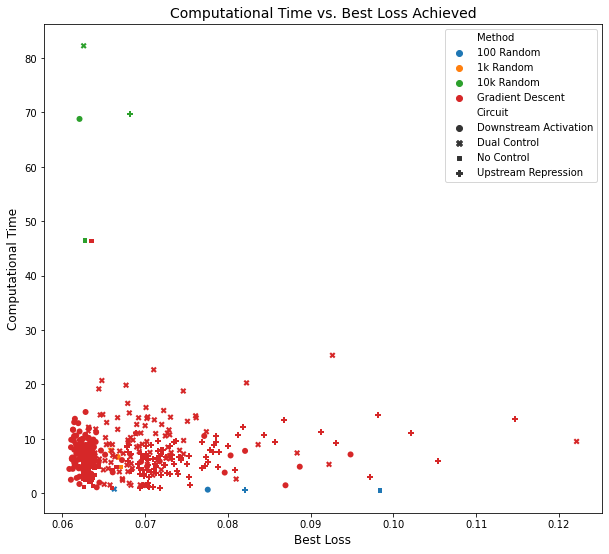

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(10, 9))
endpoint = 'Computational Time vs. Best Loss Achieved'
ax = axs
# for method in ['100 Random Samples', '1000 Random Samples', '10000 Random Samples', 'Gradient Descent', 'Grid Search']:
#     for circuit in ['Downstream Activation', 'Dual Control', 'Upstream Repression', 'No Control']
#         df = combined.loc[combined['Method'] == method].loc[combined['Circuit'] == circuit]
#         plt.plot(df.)
plot_data = combined.loc[combined['Method'] != 'Grid Search']
sns.scatterplot(x="Best Loss", y="Computational Time",
                hue="Method", style="Circuit",
                sizes=(1, 8), linewidth=0,
                data=plot_data, ax=ax)

ax.legend()
ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('Best Loss', fontsize=12)
ax.set_ylabel('Computational Time', fontsize=12)

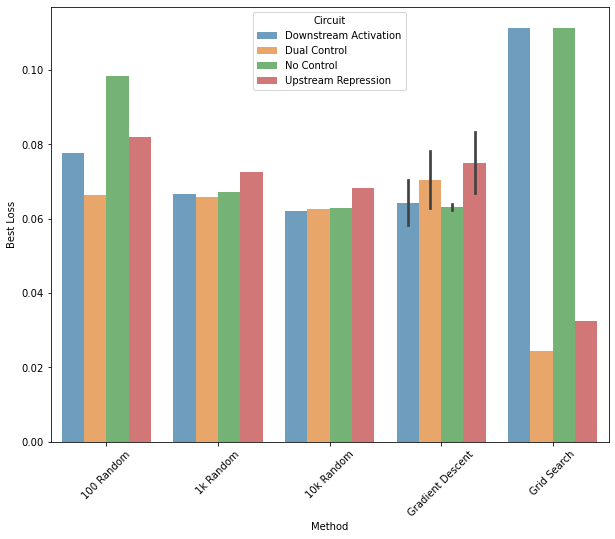

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
endpoint = 'Best Loss Achieved by Method and Circuit'
ax = axs
g = sns.barplot(
    data=combined,
    x="Method", y="Best Loss", hue="Circuit",
    ci="sd", alpha=0.7)

plt.xticks(rotation=45)
fig.savefig('bestlossfig.png')

(array([0, 1, 2]),
 [Text(0, 0, '100 Random'),
  Text(1, 0, '1k Random'),
  Text(2, 0, 'Gradient Descent')])

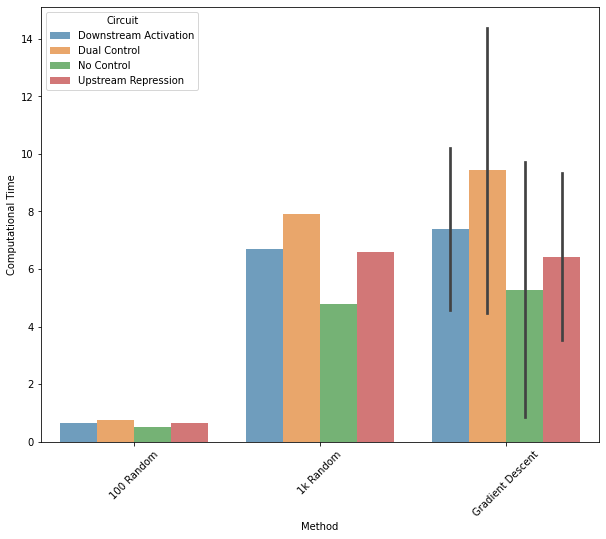

In [16]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
plot_data = plot_data.loc[plot_data['Method'] != '10k Random']

endpoint = 'Computation Time Required by Method and Circuit'
ax = axs
g = sns.barplot(
    data=plot_data,
    x="Method", y="Computational Time", hue="Circuit",
    ci="sd", alpha=0.7)

plt.xticks(rotation=45)
#fig.savefig('comptime_figure.png')

In [7]:
#Compute low losses for all grid search landscapes
tolerance = 0.04
gs_nc_ll = gs_losses_nc.loc[gs_losses_nc.loss < gs_losses_nc.loss.min() + tolerance]
gs_dc_ll = gs_losses_dc.loc[gs_losses_dc.loss < gs_losses_dc.loss.min() + tolerance]
gs_da_ll = gs_losses_da.loc[gs_losses_da.loss < gs_losses_da.loss.min() + tolerance]
gs_ur_ll = gs_losses_ur.loc[gs_losses_ur.loss < gs_losses_ur.loss.min() + tolerance]

In [7]:

loss_auc_df = pd.DataFrame(columns=['Circuit', 'Computational Time', 'Best Loss', 'Loss AUC'])


#Gradient descent data processing
for i in range(100):
    gd_single = gd.loc[gd.initialization == i]
    for c in ['nc','dc','da','ur']:
        df = gd_single.loc[gd_single.circuit == c]
        best_loss = df.loss.min()
        loss_auc = df.loss_auc.min()
        time = df.time.min()
        circuit = circuit_converter(c)
        row = pd.DataFrame({'Circuit': [circuit], 'Computational Time':[time], 'Best Loss':[best_loss], 'Loss AUC':[loss_auc]})
        loss_auc_df = pd.concat([loss_auc_df, row])



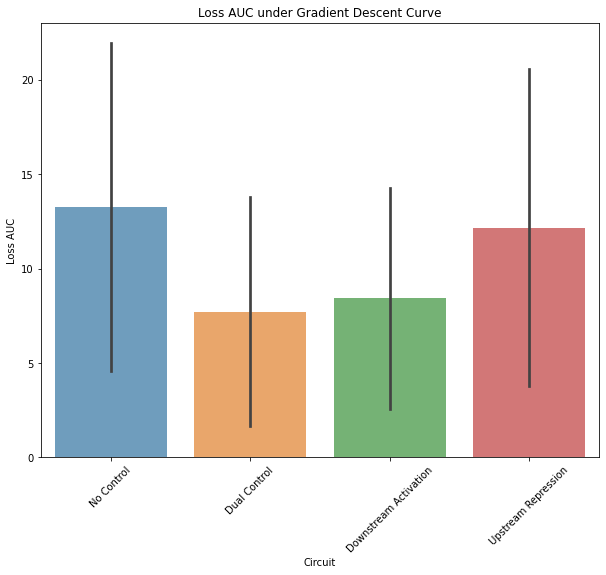

In [15]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
endpoint = 'Loss AUC under Gradient Descent Curve'
ax = axs
g = sns.barplot(
    data=loss_auc_df,
    x="Circuit", y="Loss AUC",
    ci="sd", alpha=0.7)
plt.title(endpoint)
plt.xticks(rotation=45)
fig.savefig('loss_auc.png')

In [28]:
#Find solutions in DA space to sample around
low_loss = gd.loc[gd.circuit == 'da'].loc[gd.loss < 0.1]

In [31]:
low_loss.groupby('initialization').count()['loss']

initialization
1       5
2       5
3       3
4       6
5       4
       ..
96     13
97      9
98      3
99     13
100     9
Name: loss, Length: 100, dtype: int64